# Single Objective Optimization (SLSQP)

In [1]:
from wpaf_opt import *
import time

# ============================================================================ #
#                       Single Objective Optimization                          #
# ============================================================================ #

start_time = time.time()
args = {}
# x0 = [27.74269661,	41.77910928,	30.74200375,	7.949304467]
# args['x0'] = x0
x_init, p_init, x, soo_res_best, p_best, op_obj = wpaf_single_opt(args_in = args)

print('Execution time:', time.time() - start_time, 'seconds')

wpaf_init_obj = WPAF(x_init.nom0, x_init.name, p_init.nom_dict)
wpaf_opt_obj = WPAF(soo_res_best.x, x.name, p_best) 

#TODO: check all costs to be in 2023 $
#TODO: Update lifetime to 10 or 15 years

#print_init_result(wpaf_init_obj)
print_soo_optimize_result(wpaf_opt_obj, x.list, x.unit, soo_res_best)

Execution time: 88.79984617233276 seconds
optimization success:  True
optimal design variable:
   capture_width      69.154 [m]
   pen_diameter       45.000 [m]
   pen_height         30.000 [m]
   stock_density       6.398 [kg/m^3]
   pen number         12.000 [-]
----------------------------------------
optimal objective function terms:
   Objective_func      8.996
   cost per yield      8.996 [$ / kg]
   NPV               295.417 [Million $]
   fish yield          3.100 [kilo Tonne]
----------------------------------------
optimal wave energy converter:
   wec number         21.611 [-]
   wec_P_ave          18.033 [kW]
   wec AEP        3416059.375 [kWh]
----------------------------------------
optimal price break down WPAF:
   WPAF NPV                       295.417 [Million $] 100.0 [%]
   |__ wec NPV                    139.408 [Million $]  47.2 [%]
   |   |__ wec CapEx              111.139 [Million $]  37.6 [%]
   |   |__ wec OpEx                28.269 [Million $]   9.6 [%]
   |__ 

# Plot Objective Function and Constraints (Convergence Results)

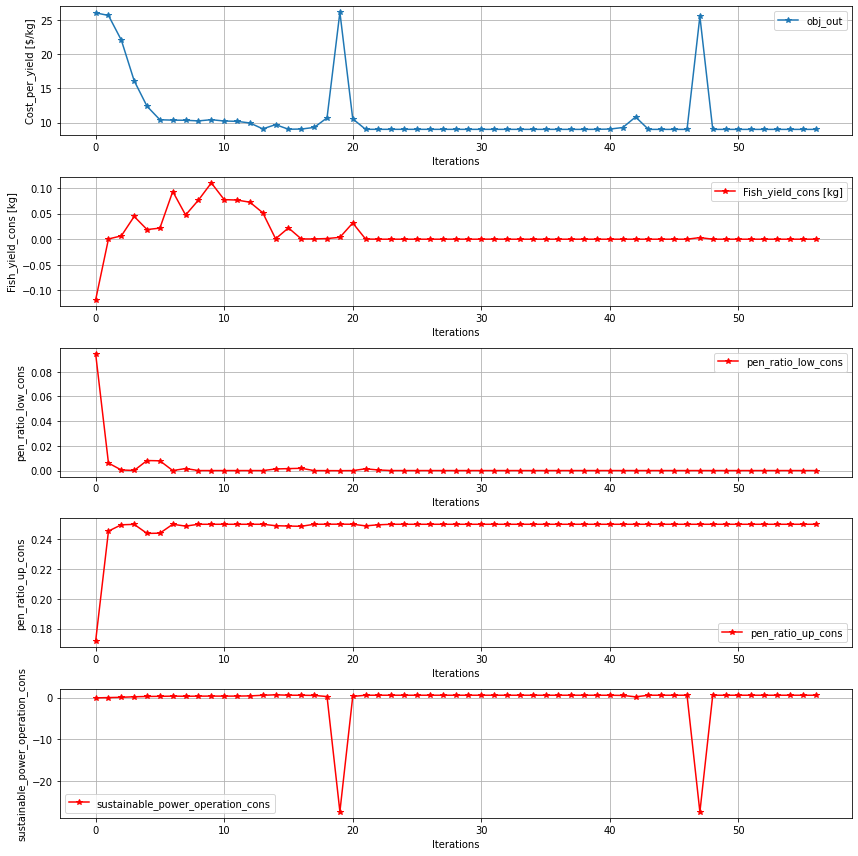

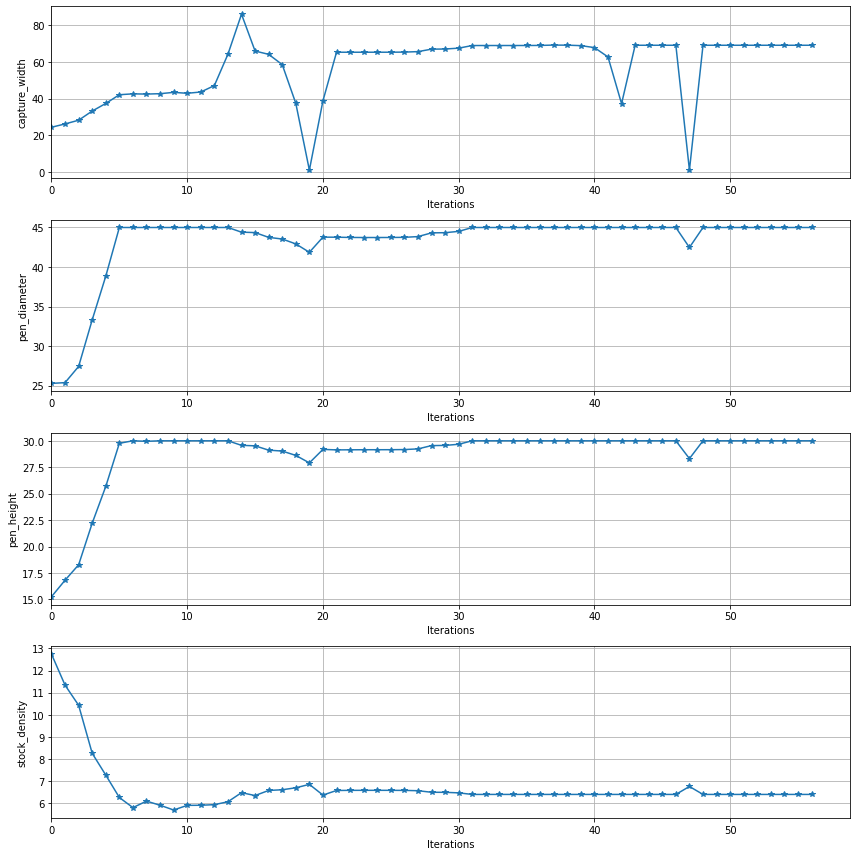

In [2]:
from matplotlib import pyplot as plt

cons_title = ['Fish_yield_cons [kg]','pen_ratio_low_cons', 'pen_ratio_up_cons', 'sustainable_power_operation_cons']
cons_no = len(cons_title)

fig, axes = plt.subplots(1+cons_no, 1, figsize=(12, 12))

ax0 = axes[0]
ax0.plot(op_obj.f, label='obj_out', marker='*')
ax0.set(xlabel='Iterations', ylabel='Cost_per_yield [$/kg]')
ax0.legend()
ax0.grid(True)


for i in range (cons_no):
    ax_cons = axes[i+1]
    ax_cons.plot(op_obj.ineq[:, i], 'r', label=cons_title[i], marker='*')
    ax_cons.set(xlabel='Iterations', ylabel=cons_title[i]);
    ax_cons.legend()
    ax_cons.grid(True)

plt.tight_layout()
plt.show()

#fig for design var
fig_x, ax_x = plt.subplots(len(x.list),1, figsize=(12, 12))
for ii in range(len(x.list)):
    ax_x[ii] = plt.subplot(len(x.list),1,ii+1)
for i in range(len(x.list)):
    ax_x[i].plot(op_obj.x_history[:, i], marker='*')
    ax_x[i].set(xlabel='Iterations', ylabel=x.list[i])
    ax_x[i].grid(True)
    ax_x[i].set_xlim(0, None)
    #ax_x[i].set_ylim(5, 85)
    ax_x[i].ticklabel_format(useOffset=False, style='plain', axis='y')
plt.tight_layout()
plt.show()

# Plot power

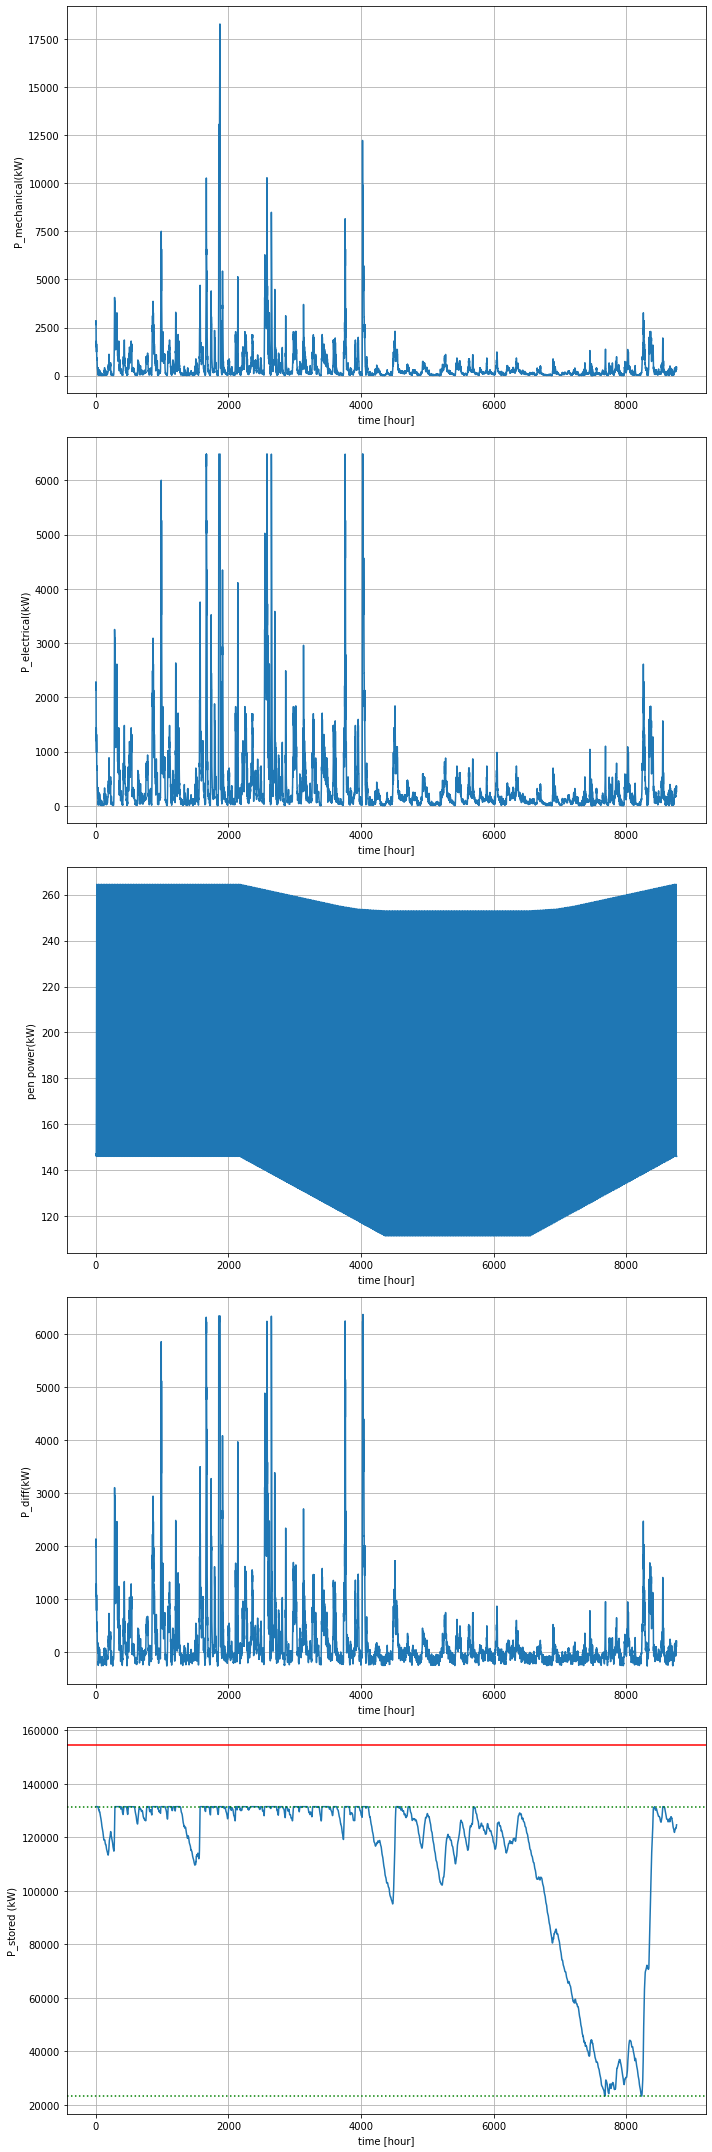

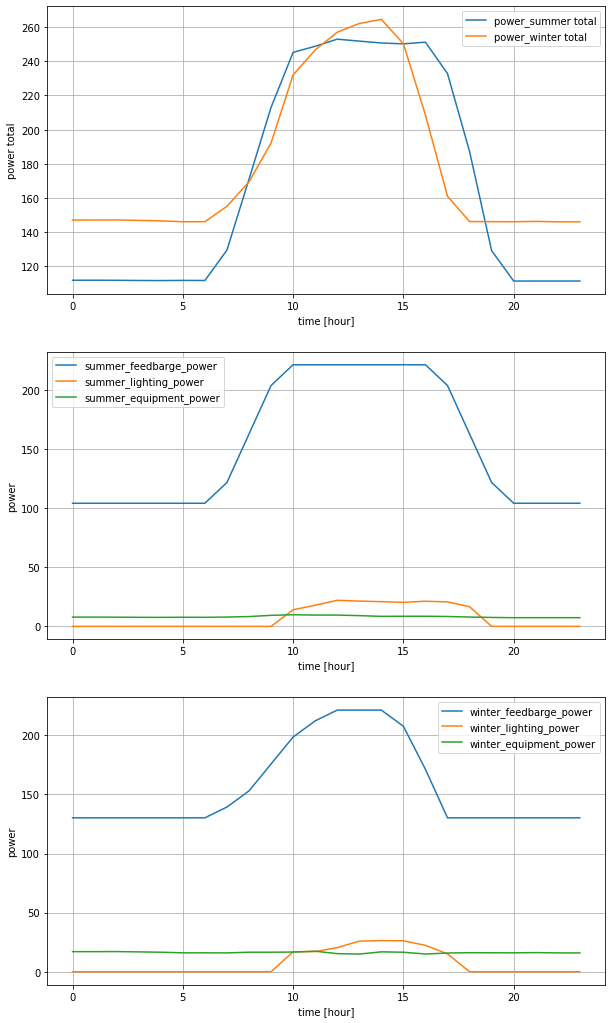

In [3]:
wpaf_opt_obj.plot_power()

# Plot fish growth and fish oxygen demand

DO2 for 1kg fish 504.2788423858458
DO2 for 2kg fish 1174.7045514567676
DO2 for 3kg fish 1885.5099944513904
DO2 for 4kg fish 2592.876196676822
fish weight after 365 days 4216.750932751627


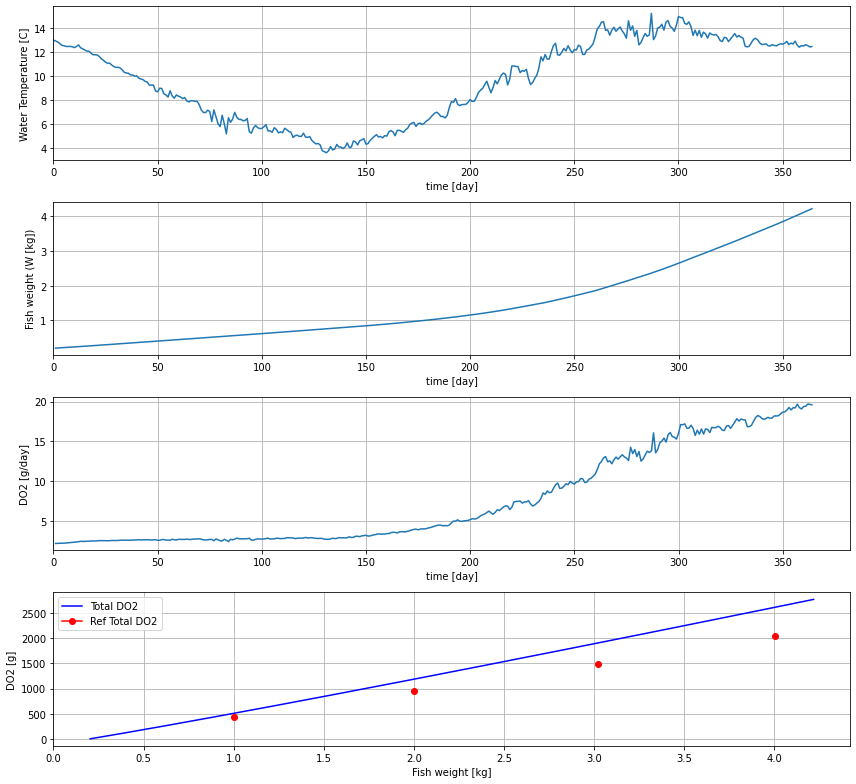

In [4]:
wpaf_opt_obj.plot_variable()

# Single Objective Optimization (NSGA2)

In [ ]:
from wpaf_opt import *

start_time = time.time()
args = {}
args['moo_n_obj'] = 1
x, moo_res_best, p_best, op_obj = wpaf_multi_opt(args_in = args)

print('Execution time:', time.time() - start_time, 'seconds')

wpaf_opt_obj = WPAF(moo_res_best.X, x.name, p_best) 
print_moo_optimize_result(wpaf_opt_obj, x.list, x.unit, moo_res_best)

Execution time: 6959.157937049866 seconds
optimization success: True
optimal design variable:
   capture_width      67.297 [m]
   pen_diameter       44.519 [m]
   pen_height         29.557 [m]
   stock_density       6.457 [kg/m^3]
   pen number         12.000 [-]
----------------------------------------
optimal objective function terms:
   Objective_func      9.001
   cost per yield      9.001 [$ / kg]
   NPV               287.647 [Million $]
   fish yield          3.016 [kilo Tonne]
----------------------------------------
optimal wave energy converter:
   wec number         21.030 [-]
   wec_P_ave          18.033 [kW]
   wec AEP        3324327.496 [kWh]
----------------------------------------
optimal price break down WPAF:
   WPAF NPV                       287.647 [Million $] 100.0 [%]
   |__ wec NPV                    135.665 [Million $]  47.2 [%]
   |   |__ wec CapEx              108.155 [Million $]  37.6 [%]
   |   |__ wec OpEx                27.510 [Million $]   9.6 [%]
   |__ a